[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-421 Aprendizado Profundo (*Deep Leraning*)**
## **Detecção de mudanças em séries temporais usando Redes Neurais Recorrentes**



**Docente:** *Prof. Dr. Thales Sehn Körti*

**Discente:** *Lourenço José Cavalcante Neto*

---



## **Resumo**

Nesta atividade, foi trabalhada a detecção de mudanças em séries temporais usando Redes Neurais Recorrentes (RNN). O objetivo principal foi analisar dados temporais derivados de imagens de sensoriamento remoto, identificando pontos de distúrbio com base em diferenças significativas entre valores reais e previstos. Este trabalho combinou técnicas fundamentais de aprendizado profundo e análise de séries temporais, destacando a utilidade de redes recorrentes na detecção de anomalias em dados sequenciais.

In [2]:
# Import required libraries
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

In [3]:
# Function to prepare the input X and target Y
def get_XY(time_series, time_steps):
    Y_ind = np.arange(time_steps, len(time_series), time_steps)
    Y = time_series[Y_ind]
    rows_x = len(Y)
    X = time_series[range(time_steps * rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

# Load data from a URL and normalize it
def load_time_series(url):
    data_frame = read_csv(url, usecols=[1])
    data = np.array(data_frame.values.astype("float32")).flatten()
    data = data / data.max()
    return data

# Plot the results of change detection
def plot_change_detection(y_test, test_predict, title):
    difference = np.abs(y_test - test_predict.flatten())
    change_threshold = difference.max() * 0.8

    plt.figure(figsize=(15, 5))
    plt.plot(y_test, label="Real values")
    plt.plot(test_predict.flatten(), label="Predicted values")
    plt.plot(difference, label="Difference")
    plt.plot(difference > change_threshold, label="Change detected")
    plt.legend()
    plt.xlabel("Observation number after given time steps")
    plt.ylabel("Normalized values")
    plt.title(title)
    plt.show()

## Exercise 1: Define SimpleRNN model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


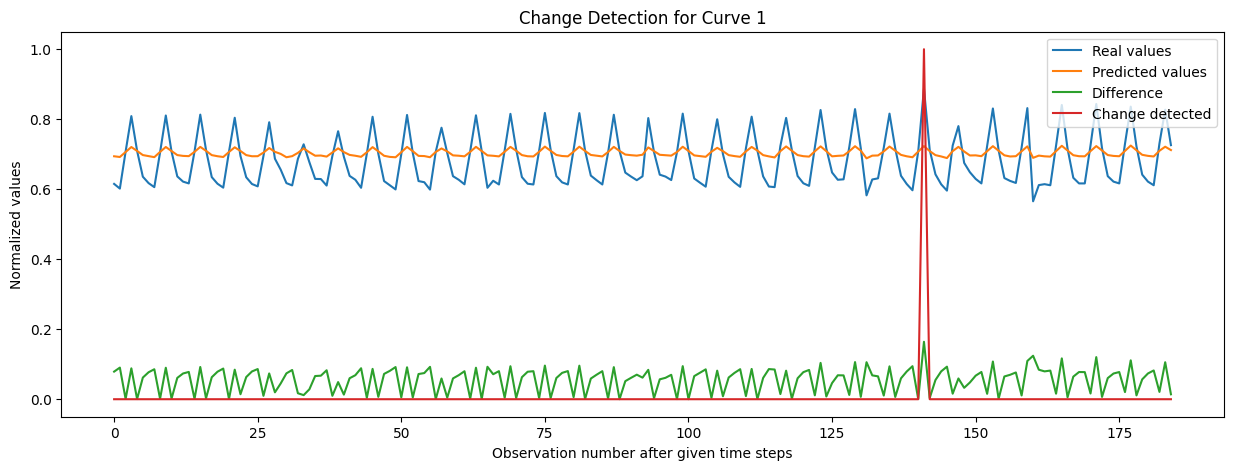

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


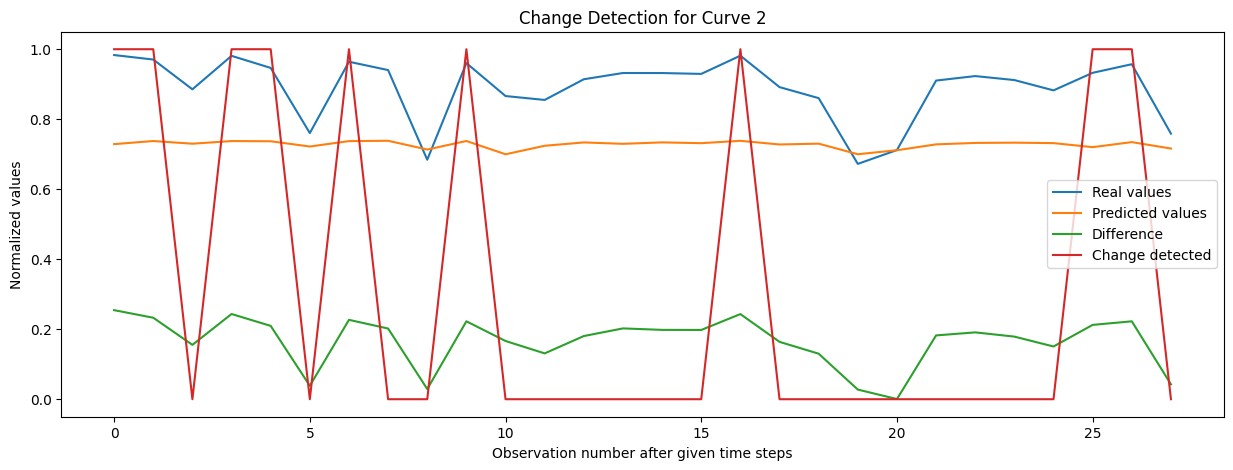

In [4]:
# -----------------------------
# Exercise 1: Define SimpleRNN model
# -----------------------------
simple_rnn_model = Sequential()
simple_rnn_model.add(SimpleRNN(10, input_shape=(24, 1), activation="tanh"))
simple_rnn_model.add(Dense(units=1, activation="tanh"))
simple_rnn_model.compile(loss="mean_squared_error", optimizer="adam")

# -----------------------------
# Exercise 1: Apply SimpleRNN to new curves
# -----------------------------
curves = {
    "Curve 1": "https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_703_time_series.csv",
    "Curve 2": "https://raw.githubusercontent.com/tkorting/remote-sensing-images/refs/heads/master/tg32_time_series.csv",
}

for name, url in curves.items():
    data = load_time_series(url)
    X, y = get_XY(data, 24)

    # Use the SimpleRNN model to make predictions
    test_predict = simple_rnn_model.predict(X)

    # Plot the results for change detection
    plot_change_detection(y, test_predict, f"Change Detection for {name}")

## Exercise 2: Load training and testing data

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1879 - val_loss: 0.0056
Epoch 2/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 3/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 4/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 5/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 6/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 7/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 9/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 10/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 9.9728e-04
Epoch 11/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 12/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss

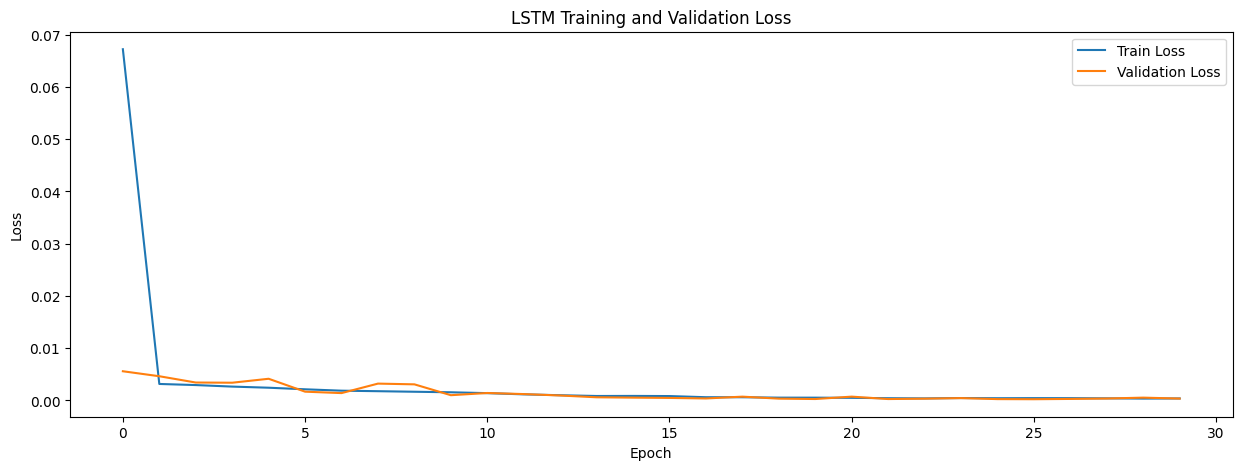

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


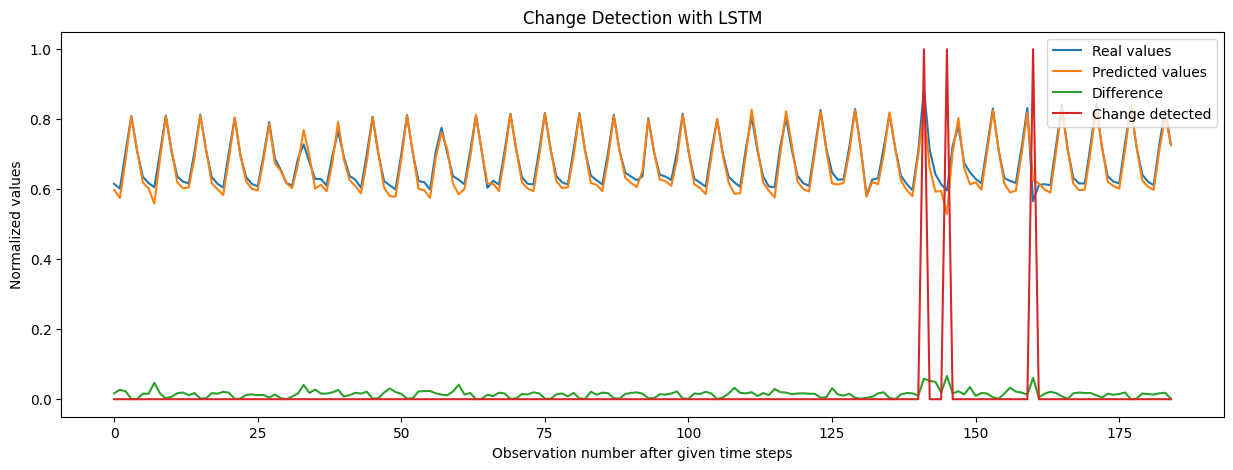

In [5]:


# -----------------------------
# Exercise 2: Load training and testing data
# -----------------------------
train_url = "https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_756_time_series.csv"
test_url = "https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_703_time_series.csv"

train_data = load_time_series(train_url)
test_data = load_time_series(test_url)

# -----------------------------
# Exercise 2: Prepare datasets
# -----------------------------
X_train, y_train = get_XY(train_data, 24)
X_test, y_test = get_XY(test_data, 24)

# -----------------------------
# Exercise 2: Define LSTM model
# -----------------------------
lstm_model = Sequential()
lstm_model.add(LSTM(10, input_shape=(24, 1), activation="tanh"))
lstm_model.add(Dense(units=1, activation="tanh"))
lstm_model.compile(loss="mean_squared_error", optimizer="adam")

# -----------------------------
# Exercise 2: Train the LSTM model
# -----------------------------
history = lstm_model.fit(
    X_train, y_train, epochs=30, batch_size=1, validation_data=(X_test, y_test)
)

# Plot training and validation loss
plt.figure(figsize=(15, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -----------------------------
# Exercise 2: Make predictions with LSTM
# -----------------------------
test_predict = lstm_model.predict(X_test)

# Plot change detection results for LSTM
plot_change_detection(y_test, test_predict, "Change Detection with LSTM")


# Referências
---

[graham1990] **Concrete Mathematics**. Ronald Graham, Donald Knuth, Oren Patashnik.

[chollet2018] **Deep Learning with Phyton**. François Chollet. https://livebook.manning.com/book/deep-learning-with-python/

[goodfellow2016] **The Deep Learning Book**. Ian Goodfellow, Yoshua Bengio, Aaron Courville. https://www.deeplearningbook.org/

[graves2012] **Supervised Sequence Labelling with Recurrent Neural Networks**. Alex Graves.

[simplernn2021] **Understanding Simple Recurrent Neural Networks In Keras**. https://machinelearningmastery.com/start-here/

[karpathy2015] **The Unreasonable Effectiveness of Recurrent Neural Networks**. https://karpathy.github.io/2015/05/21/rnn-effectiveness/

[hochreiter1997] **Long Short-Term Memory**, Sepp Hochreiter, Jurgen Schmidhuber. http://www.bioinf.jku.at/publications/older/2604.pdf

[rumelhart1986] **Learning representations byback-propagating error**. David Rumelhart, Geoffrey Hinton, Ronald Williams. http://www.cs.toronto.edu/~hinton/absps/naturebp.pdf

[colah2015] **Understanding LSTM Networks**. http://colah.github.io/posts/2015-08-Understanding-LSTMs/

[chung2014] **Empirical Evaluation of Gated Recurrent Neural  Networks on Sequence Modeling**. Junyoung Chung, Caglar Gulcehre, KyungHyun Cho, Yoshua Bengio. https://arxiv.org/pdf/1412.3555.pdf